In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg
from sklearn.preprocessing import StandardScaler 


In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


### Group one seperation

In [3]:
group_one = dataset[dataset["Diagnosis"] == 0]
group_two = dataset[dataset["Diagnosis"] == 2]

combined_group_one = pd.concat([group_one, group_two], ignore_index = True)
combined_group_one["Diagnosis"].unique()

array([0, 2])

In [4]:
combined_group_one

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
1,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
2,14,1,78.6137,0,29.0,0.12,188.33,0.49,183.76,39.63,...,241.64,0.44,226.48,35.11,664.29,3.10,8478.33,3.01,1809.0,3292.0
3,15,0,80.9068,0,29.0,0.10,161.28,0.54,174.53,35.94,...,221.76,0.45,NaN,30.57,NaN,3.12,4287.78,2.90,2188.0,3603.0
4,16,0,65.5205,0,28.0,0.12,166.97,0.58,202.96,38.42,...,228.53,0.50,228.72,28.98,686.36,2.90,-1381.99,2.73,1829.0,3695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,549,0,68.8849,2,25.0,0.11,169.76,0.58,205.91,38.90,...,219.32,0.53,229.07,30.38,696.95,3.05,1.54,3.53,2140.0,3801.0
274,658,0,72.2822,2,30.0,0.13,187.66,0.57,222.54,37.58,...,206.16,0.55,227.90,30.10,705.46,3.03,281.47,NaN,2750.0,3345.0
275,1244,0,79.0877,2,24.0,0.13,152.52,0.63,208.54,35.72,...,220.67,0.53,231.71,30.18,706.18,3.02,28.95,2.98,2016.0,3532.0
276,1311,0,69.2110,2,29.0,0.10,175.27,0.50,187.40,44.04,...,222.69,0.52,229.54,32.03,695.47,3.05,2811.38,2.98,1605.0,3219.0


In [6]:
combined_group_one.shape

(278, 24)

In [5]:
combined_group_one.isna().sum()

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
MMSE0m                         0
HipsASMbaseline               13
HipsContrastbaseline          11
HipsCorelationbaseline        12
HipsVariancebaseline           5
HipsSumAveragebaseline         1
HipsSumVariancebaseline        5
HipsEntropybaseline           18
HipsClusterShadebaseline      11
ERCsASMbaseline                3
ERCsContrastbaseline           2
ERCsCorelationbaseline         4
ERCsVariancebaseline           4
ERCsSumAveragebaseline         7
ERCsSumVariancebaseline        4
ERCsEntropybaseline            3
ERCsClusterShadebaseline      30
ERCs_thicknessbaseline        19
ERCsVolumebaseline            10
HipposcampusVolumebaseline    10
dtype: int64

In [11]:
combined_group_one_drop = combined_group_one.dropna()
combined_group_one_drop.shape

(189, 24)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer

# let's separate into training and testing set
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    combined_group_one_drop.drop("Diagnosis", axis=1),  
    combined_group_one_drop["Diagnosis"],  
    test_size=0.3,  
    random_state=0,  
)

X_train_t.shape, X_test_t.shape

((132, 23), (57, 23))

In [15]:
y_split_one = combined_group_one_drop["Diagnosis"]
y_split_one.value_counts()

Diagnosis
0    130
2     59
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

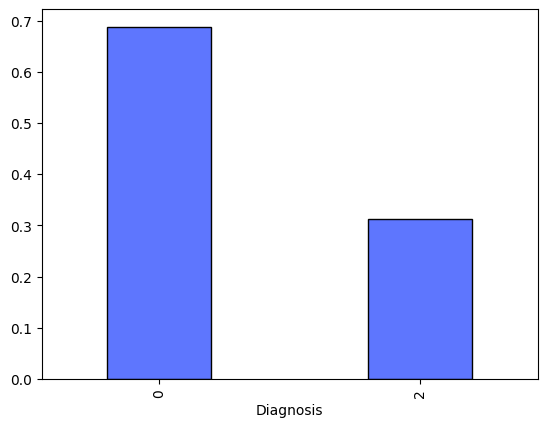

In [16]:
y_split_one.value_counts(normalize=True).plot(kind="bar",
                                                color = "#5e76fe",
                                                width = 0.4,
                                                edgecolor = "black",)

### Test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    combined_group_one.drop("Diagnosis", axis=1),  
    combined_group_one["Diagnosis"],  
    test_size=0.3,  
    random_state=0,  
)

X_train.shape, X_test.shape

((194, 23), (84, 23))

In [6]:
pipe = Pipeline([
    ("imputer", MeanMedianImputer(
        imputation_method="mean", 
        variables=[
            'MMSE0m', 'HipsASMbaseline', 'HipsContrastbaseline',
            'HipsCorelationbaseline', 'HipsVariancebaseline',
            'HipsSumAveragebaseline', 'HipsSumVariancebaseline',
            'HipsEntropybaseline', 'HipsClusterShadebaseline', 
            'ERCsASMbaseline', 'ERCsContrastbaseline', 
            'ERCsCorelationbaseline', 'ERCsVariancebaseline', 
            'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
            'ERCsEntropybaseline', 'ERCsClusterShadebaseline', 
            'ERCs_thicknessbaseline', 'ERCsVolumebaseline', 
            'HipposcampusVolumebaseline'
        ]
    )),
    ("scaler", StandardScaler().set_output(transform="pandas")),
])

pipe.fit(X_train)

# let's transform the data with the pipeline
X_train_scaled = pipe.transform(X_train)
X_test_scaled = pipe.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def run_model(model, classifier_name, X_train, y_train):
        
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted"), 
                   "recall": make_scorer(recall_score, average="weighted"), 
                   "f1_weighted": make_scorer(f1_score, average="weighted"),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(model,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = model.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [8]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight="balanced",
        )
lg = LogisticRegression(multi_class = "auto", solver = "lbfgs", max_iter = 1000, random_state = 42)

svm = SVC(kernel ='rbf', decision_function_shape ='ovr', probability = True, random_state = 42)

dt = DecisionTreeClassifier(criterion ='gini', max_depth = 5, min_samples_split = 10,
                                                  min_samples_leaf = 5, max_features = 'sqrt', random_state = 42)

In [9]:
model_rf, metrics_rf = run_model(rf, "Random Forest", X_train, y_train)
model_dt, metrics_dt = run_model(dt, "Decision Tree", X_train, y_train)
model_lg, metrics_lg = run_model(svm, "Logistic Regression", X_train_scaled, y_train)
model_svm, metrics_svm = run_model(lg, "Support Vector Machine", X_train_scaled, y_train)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv

In [10]:
validation_df = pd.concat([metrics_rf, metrics_dt, metrics_lg, metrics_svm])
validation_df_report = validation_df.set_index(["Classifier", "Fit Time", "Metric"])
validation_df_report

Mean Train  Std Train  \
Classifier             Fit Time Metric                                        
Random Forest          0.450    accuracy                   0.996      0.003   
                                balanced_accuracy          0.993      0.006   
                                precision                  0.996      0.003   
                                recall                     0.996      0.003   
                                f1_weighted                0.996      0.003   
                                roc_auc_ovr_weighted       1.000      0.000   
Decision Tree          0.003    accuracy                   0.893      0.016   
                                balanced_accuracy          0.840      0.024   
                                precision                  0.893      0.017   
                                recall                     0.893      0.016   
                                f1_weighted                0.890      0.017   
                                roc_auc_ovr_weighted       0.947      0.009   
Logistic Regression    0.010    accuracy                   0.963      0.005   
                                balanced_accuracy          0.940      0.009   
                                precision                  0.963      0.005   
                                recall                     0.963      0.005   
                                f1_weighted                0.962      0.005   
                                roc_auc_ovr_weighted       0.996      0.001   
Support Vector Machine 0.007    accuracy                   0.939      0.016   
                                balanced_accuracy          0.924      0.016   
                                precision                  0.940      0.015   
                                recall                     0.939      0.016   
                                f1_weighted                0.939      0.016   
                                roc_auc_ovr_weighted       0.981      0.004   

                                                      Mean Test  Std Test  
Classifier             Fit Time Metric                                     
Random Forest          0.450    accuracy                  0.871     0.044  
                                balanced_accuracy         0.808     0.070  
                                precision                 0.873     0.047  
                                recall                    0.871     0.044  
                                f1_weighted               0.865     0.048  
                                roc_auc_ovr_weighted      0.915     0.071  
Decision Tree          0.003    accuracy                  0.809     0.064  
                                balanced_accuracy         0.738     0.061  
                                precision                 0.813     0.064  
                                recall                    0.809     0.064  
                                f1_weighted               0.804     0.060  
                                roc_auc_ovr_weighted      0.797     0.082  
Logistic Regression    0.010    accuracy                  0.907     0.040  
                                balanced_accuracy         0.860     0.060  
                                precision                 0.906     0.042  
                                recall                    0.907     0.040  
                                f1_weighted               0.904     0.042  
                                roc_auc_ovr_weighted      0.952     0.030  
Support Vector Machine 0.007    accuracy                  0.891     0.031  
                                balanced_accuracy         0.868     0.045  
                                precision                 0.897     0.031  
                                recall                    0.891     0.031  
                                f1_weighted               0.892     0.030  
                                roc_auc_ovr_weighted      0.942     0.035

In [18]:
import time

def model_eval(model, classifier_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    
    # Ensure that y_train and y_test are 1D arrays
    y_train = np.array(y_train).ravel()
    y_test = np.array(y_test).ravel()
    
    # Get predicted probabilities for ROC AUC
    pred_train_proba = model.predict_proba(X_train)
    pred_test_proba = model.predict_proba(X_test)
    
    # Get predicted classes for other metrics
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # For binary classification, use the probability of the positive class only:
    roc_auc_train = roc_auc_score(y_train, pred_train_proba[:, 1])
    roc_auc_test = roc_auc_score(y_test, pred_test_proba[:, 1])
    
    # Calculate metrics
    metrics_train = {
        "accuracy": round(accuracy_score(y_train, pred_train), 3),
        "balanced_accuracy": round(balanced_accuracy_score(y_train, pred_train), 3),
        "precision": round(precision_score(y_train, pred_train, average="weighted"), 3),
        "recall": round(recall_score(y_train, pred_train, average="weighted"), 3),
        "f1_weighted": round(f1_score(y_train, pred_train, average="weighted"), 3),
        "roc_auc": round(roc_auc_train, 3),
    }
    
    metrics_test = {
        "accuracy": round(accuracy_score(y_test, pred_test), 3),
        "balanced_accuracy": round(balanced_accuracy_score(y_test, pred_test), 3),
        "precision": round(precision_score(y_test, pred_test, average="weighted"), 3),
        "recall": round(recall_score(y_test, pred_test, average="weighted"), 3),
        "f1_weighted": round(f1_score(y_test, pred_test, average="weighted"), 3),
        "roc_auc": round(roc_auc_test, 3),
    }
            
    elapsed_time = time.time() - start_time

    # Create the DataFrame without additional rounding issues
    pred_metrics_df = pd.DataFrame({
        "Classifier": classifier_name,
        "Classification Time": round(elapsed_time, 3),
        "Metric": list(metrics_train.keys()),
        "Train data": list(metrics_train.values()),
        "Test data": list(metrics_test.values()),
    })
    
    return pred_metrics_df

In [19]:
pred_rf = model_eval(model_rf,"Random Forest", X_train, X_test, y_train, y_test)
pred_dt = model_eval(model_dt,"Decision Tree", X_train, X_test, y_train, y_test)
pred_lg = model_eval(model_lg,"Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)
pred_svm = model_eval(model_svm,"Support Vector Machine", X_train_scaled, X_test_scaled, y_train, y_test)

In [20]:
prediction_df = pd.concat([pred_rf, pred_dt, pred_lg, pred_svm])
prediction_df_report = prediction_df.set_index(["Classifier", "Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier             Classification Time Metric                          
Random Forest          0.123               accuracy                0.995   
                                           balanced_accuracy       0.991   
                                           precision               0.995   
                                           recall                  0.995   
                                           f1_weighted             0.995   
                                           roc_auc                 1.000   
Decision Tree          0.041               accuracy                0.897   
                                           balanced_accuracy       0.838   
                                           precision               0.898   
                                           recall                  0.897   
                                           f1_weighted             0.893   
                                           roc_auc                 0.929   
Logistic Regression    0.041               accuracy                0.964   
                                           balanced_accuracy       0.947   
                                           precision               0.964   
                                           recall                  0.964   
                                           f1_weighted             0.964   
                                           roc_auc                 0.996   
Support Vector Machine 0.024               accuracy                0.928   
                                           balanced_accuracy       0.910   
                                           precision               0.928   
                                           recall                  0.928   
                                           f1_weighted             0.928   
                                           roc_auc                 0.977   

                                                              Test data  
Classifier             Classification Time Metric                        
Random Forest          0.123               accuracy               0.893  
                                           balanced_accuracy      0.865  
                                           precision              0.895  
                                           recall                 0.893  
                                           f1_weighted            0.890  
                                           roc_auc                0.965  
Decision Tree          0.041               accuracy               0.810  
                                           balanced_accuracy      0.741  
                                           precision              0.836  
                                           recall                 0.810  
                                           f1_weighted            0.791  
                                           roc_auc                0.959  
Logistic Regression    0.041               accuracy               0.952  
                                           balanced_accuracy      0.933  
                                           precision              0.956  
                                           recall                 0.952  
                                           f1_weighted            0.952  
                                           roc_auc                0.978  
Support Vector Machine 0.024               accuracy               0.917  
                                           balanced_accuracy      0.898  
                                           precision              0.917  
                                           recall                 0.917  
                                           f1_weighted            0.916  
                                           roc_auc                0.977